In [301]:
import pandas as pd
from tabulate import tabulate
import numpy as np
from math import exp, log
import matplotlib.pyplot as plt
import pylab as plb

In [302]:
x = [0.4, 0.8, 1.2, 1.6, 2, 2.3]
y = [8, 10, 12, 18, 35, 60]

In [303]:
x2 = list(map(lambda x: x**2, x))
lny = list(map(lambda y: log(y), y))
xlny = list(map(lambda x,y: x*log(y), x,y))
p = sum(lny)/len(lny)
lny_p2 = list(map(lambda y: (log(y)-p)**2, y))
#last_column = list(map(lambda x, y: (log(y)-(lna+b*x))**2, x,y ))


In [304]:
vector = np.array([[sum(lny)],[sum(xlny)]])
print(vector)

[[17.40699767]
 [26.8080161 ]]


In [305]:
matrix = np.array([[len(x), sum(x)],[sum(x), sum(x2)]])
print(matrix)

[[ 6.    8.3 ]
 [ 8.3  14.09]]


In [306]:
matrix_inv = np.linalg.inv(matrix)
print(matrix_inv)

[[ 0.90031949 -0.53035144]
 [-0.53035144  0.38338658]]


In [307]:
lna = np.matmul(matrix_inv,vector)[0]
b = np.matmul(matrix_inv,vector)[1]
print(lna,b)

[1.45418936] [1.04600741]


In [308]:
last_column = list(map(lambda x, y: (log(y)-(lna+b*x))**2, x,y ))
print(last_column)

[array([0.0427866]), array([0.00013432]), array([0.05039648]), array([0.05637275]), array([8.36105577e-05]), array([0.05491437])]


In [309]:
data_final = pd.DataFrame(list(zip(x,y,x2,lny,xlny,lny_p2, last_column)), columns=['x','y','x²','ln(y)','x*ln(y)','(ln(y)-p)²','(ln(y)-(lna+b*x))²'])
print(tabulate(data_final, headers='keys', tablefmt='psql'))

+----+-----+-----+------+---------+-----------+--------------+----------------------+
|    |   x |   y |   x² |   ln(y) |   x*ln(y) |   (ln(y)-p)² |   (ln(y)-(lna+b*x))² |
|----+-----+-----+------+---------+-----------+--------------+----------------------|
|  0 | 0.4 |   8 | 0.16 | 2.07944 |  0.831777 |  0.675232    |          0.0427866   |
|  1 | 0.8 |  10 | 0.64 | 2.30259 |  1.84207  |  0.358299    |          0.000134324 |
|  2 | 1.2 |  12 | 1.44 | 2.48491 |  2.98189  |  0.173272    |          0.0503965   |
|  3 | 1.6 |  18 | 2.56 | 2.89037 |  4.62459  |  0.000116522 |          0.0563727   |
|  4 | 2   |  35 | 4    | 3.55535 |  7.1107   |  0.427954    |          8.36106e-05 |
|  5 | 2.3 |  60 | 5.29 | 4.09434 |  9.41699  |  1.42367     |          0.0549144   |
+----+-----+-----+------+---------+-----------+--------------+----------------------+


In [310]:
data_final.loc['Total']= data_final.sum(axis=0)
print(tabulate(data_final, headers='keys', tablefmt='psql'))

+-------+-----+-----+-------+----------+-----------+--------------+----------------------+
|       |   x |   y |    x² |    ln(y) |   x*ln(y) |   (ln(y)-p)² |   (ln(y)-(lna+b*x))² |
|-------+-----+-----+-------+----------+-----------+--------------+----------------------|
| 0     | 0.4 |   8 |  0.16 |  2.07944 |  0.831777 |  0.675232    |          0.0427866   |
| 1     | 0.8 |  10 |  0.64 |  2.30259 |  1.84207  |  0.358299    |          0.000134324 |
| 2     | 1.2 |  12 |  1.44 |  2.48491 |  2.98189  |  0.173272    |          0.0503965   |
| 3     | 1.6 |  18 |  2.56 |  2.89037 |  4.62459  |  0.000116522 |          0.0563727   |
| 4     | 2   |  35 |  4    |  3.55535 |  7.1107   |  0.427954    |          8.36106e-05 |
| 5     | 2.3 |  60 |  5.29 |  4.09434 |  9.41699  |  1.42367     |          0.0549144   |
| Total | 8.3 | 143 | 14.09 | 17.407   | 26.808    |  3.05855     |          0.204688    |
+-------+-----+-----+-------+----------+-----------+--------------+----------------------+

In [311]:
alfa = exp(lna)
print(alfa)

4.281011700596514


In [312]:
beta = b[0]
print(beta)

1.0460074101495458


In [313]:
print(f'y = {alfa}e^{beta}x')

y = 4.281011700596514e^1.0460074101495458x


In [314]:
r2 = (sum(lny_p2)-sum(last_column))/sum(lny_p2)
print(r2)

[0.93307669]


Text(0.5, 1.0, 'Exponential regression')

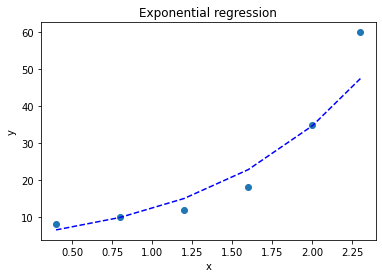

In [315]:
line = list(map(lambda x: alfa*(exp(beta*x)), x))
plt.scatter(x,y)
plb.plot(x,line,'b--')
plb.xlabel('x')
plb.ylabel('y')
plb.title('Exponential regression')